In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
class ReLU:
    @staticmethod
    def inverse(a):
        return a

    @staticmethod
    def activity(x):
        return np.maximum(x, 0.0)

class LIF:
    τRef = 2e-3
    τRC = 20e-3

    @staticmethod
    def inverse(a, τRef=τRef, τRC=τRC):
        valid = a > 0
        return 1.0 / (1.0 - np.exp((τRef - 1.0 / (valid * a + 1e-6)) / τRC))

    @staticmethod
    def activity(x, τRef=τRef, τRC=τRC):
        valid = x > (1.0 + 1e-6)
        return valid / (τRef - τRC * np.log(1.0 - valid * (1.0 / (x + 1e-6))))

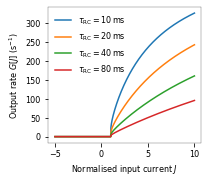

In [9]:
Js = np.linspace(-5, 10, 1000)
fig, ax = plt.subplots(figsize=(2.75, 2.5))
for τRC in [10e-3, 20e-3, 40e-3, 80e-3]:
    ax.plot(Js, LIF.activity(Js, τRC=τRC), label='$\\tau_\\mathrm{{RC}} = {}\\,\\mathrm{{ms}}$'.format(int(τRC * 1e3)))
ax.legend(loc='best');
ax.set_ylabel('Output rate $G[J]$ $(\\mathrm{s}^{-1})$')
ax.set_xlabel('Normalised input current $J$')
fig.savefig("../lif_neuron_rate_tau_rc.pdf", transparent=True, bbox_inches="tight")

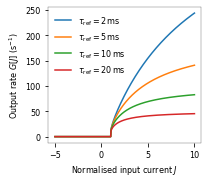

In [10]:
Js = np.linspace(-5, 10, 1000)
fig, ax = plt.subplots(figsize=(2.75, 2.5))
for τRef in [2e-3, 5e-3, 10e-3, 20e-3]:
    ax.plot(Js, LIF.activity(Js, τRef=τRef), label='$\\tau_\\mathrm{{ref}} = {}\\,\\mathrm{{ms}}$'.format(int(τRef * 1e3)))
ax.legend(loc='best');
ax.set_ylabel('Output rate $G[J]$ $(\\mathrm{s}^{-1})$')
ax.set_xlabel('Normalised input current $J$')
fig.savefig("../lif_neuron_rate_tau_ref.pdf", transparent=True, bbox_inches="tight")